Dataset shape: (303, 14)
Column names:
Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')
Sample data:
   age  gender  chest_pain  rest_bps  cholestrol  fasting_blood_sugar  \
0   63       1           3       145         233                    1   
1   37       1           2       130         250                    0   
2   41       0           1       130         204                    0   
3   56       1           1       120         236                    0   
4   57       0           0       120         354                    0   

   rest_ecg  thalach  exer_angina  old_peak  slope  ca  thalassemia  target  
0         0      150            0       2.3      0   0            1       1  
1         1      187            0       3.5      0   0            2       1  
2         0      172            0       1.4      2   0       

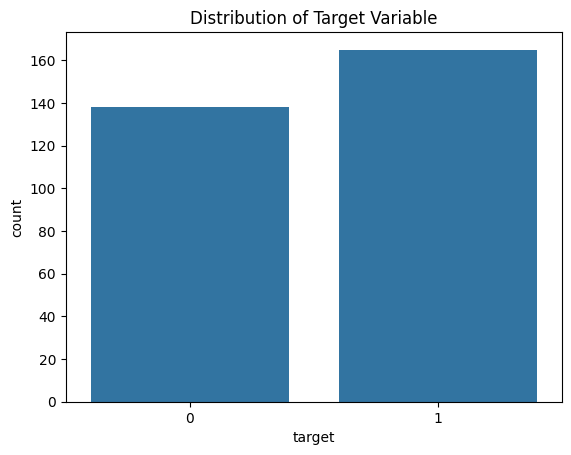


 ==================== Logistic Regression ====================
Accuracy: 0.8524590163934426
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:
 [[25  4]
 [ 5 27]]
Cross-Validation Mean Accuracy: 0.8180272108843537

 ==================== Random Forest ====================
Accuracy: 0.8688524590163934
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:
 [[24  5]
 

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("HeartDisease.csv")

# EDA
print("Dataset shape:", df.shape)
print("Column names:")
print(df.columns)
print("Sample data:")
print(df.head())
print("Summary statistics:")
print(df.describe())

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Visualize the distribution of the target variable
sns.countplot(x='target', data=df)
plt.title("Distribution of Target Variable")
plt.show()

# Split the data into features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and evaluate multiple classification algorithms
models = {'Logistic Regression': LogisticRegression(),
          'Random Forest': RandomForestClassifier(),
          'Support Vector Machine': SVC()}

for name, model in models.items():
    print("\n", "="*20, name, "="*20)
    # Training
    model.fit(X_train, y_train)
    # Predictions
    y_pred = model.predict(X_test)
    # Evaluation
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Cross-Validation Mean Accuracy:", np.mean(cv_scores))

# Select the best performing model
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
best_model_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print("\nBest Performing Model: Random Forest")
print("Accuracy:", best_model_accuracy)
